In [1]:
using SymbolicNumericIntegration
using Symbolics
using Latexify
using BenchmarkTools
include("RBFunctions.jl")
using Plots
using LinearAlgebra
using IterativeSolvers
using DoubleFloats
using BlockDiagonals

In [27]:
μ = 1
ρ = 1
@variables ϵ r x₁ x₂ ;
ϕ1 = r^7
ϕ2 = r^3

ϕ1 = substitute(ϕ1, r=>sqrt(x₁^2 + x₂^2))
ϕ2 = substitute(ϕ2, r=>sqrt(x₁^2 + x₂^2))

∂₁(exprs) = simplify(expand_derivatives(Differential(x₁)(exprs)))
∂₂(exprs) = simplify(expand_derivatives(Differential(x₂)(exprs)))

Δ(exprs) = ∂₁(∂₁(exprs)) + ∂₂(∂₂(exprs))
∂ₜ(exprs) = expand_derivatives(Differential(t)(exprs))

Φ_div = ([-∂₂(∂₂(ϕ1)) ∂₁(∂₂(ϕ1)) 0; ∂₁(∂₂(ϕ1)) -∂₁(∂₁(ϕ1)) 0; 0 0 ϕ2])

λu(x) = x[1]
λv(x) = x[2]
λp(x) = x[3]

λ1y(x) = -(μ/ρ)*Δ(x[1]) -  (1/ρ)*∂₁(x[3])
λ2y(x) = -(μ/ρ)*Δ(x[2]) -  (1/ρ)*∂₂(x[3])
λ3y(x) = x[1]
λ4y(x) = x[2]

λ1x(x) = -(μ/ρ)*Δ(x[1]) + (1/ρ)*∂₁(x[3])
λ2x(x) = -(μ/ρ)*Δ(x[2]) +  (1/ρ)*∂₂(x[3])
λ3x(x) = x[1]
λ4x(x) = x[2]
#display(Φ_div)

F_A = construct_kernel_array(Φ_div,[λ1x,λ2x,λ3x,λ4x],[λ1y,λ2y,λ3y,λ4y])
F_A_copy = deepcopy(F_A)
display(F_A)
F_A = compile_kernel_array(F_A)
F_B = construct_kernel_array(Φ_div,[λ3x,λ4x],[λ1y,λ2y,λ3y,λ4y])
F_B_copy = deepcopy(F_B)
#display(F_B)
F_B = compile_kernel_array(F_B)

P_list2D = generate_2D2_div_free_poly_basis(4)
P_list1D = generate_2D1_poly_basis(4)
P_list = []
for p2 in P_list2D
    append!(P_list, [vcat(p2,Num(0.0))])
end
for p1 in P_list1D[2:end]
    append!(P_list, [vcat(Num(0.0),Num(0.0),p1)])
end
display(P_list)

F_PA = apply_functionals_to_polynomials([λ1x,λ2x,λ3x,λ4x],P_list)
F_PA_copy = deepcopy(F_PA)
display(F_PA)
F_PA = compile_polynomials(F_PA)

F_PB = apply_functionals_to_polynomials([λ3x,λ4x],P_list)
F_PB_copy = deepcopy(F_PB)
display(F_PB)
F_PB = compile_polynomials(F_PB)

N_poly = size(F_PA)[2]

println("done")


4×4 Matrix{Num}:
 (-3(x₁^2) - 3(sqrt(x₁^2 + x₂^2)^2)) / sqrt(x₁^2 + x₂^2) + (1680.0(x₂^4)*(sqrt(x₁^2 + x₂^2)^2) + 630.0(x₁^2)*(x₂^2)*(sqrt(x₁^2 + x₂^2)^2) - 315.0(x₂^6) - 1890.0(sqrt(x₁^2 + x₂^2)^6) - 315.0(x₁^2)*(x₂^4) - 315.0(x₁^2)*(sqrt(x₁^2 + x₂^2)^4) - 5355.0(x₂^2)*(sqrt(x₁^2 + x₂^2)^4)) / (sqrt(x₁^2 + x₂^2)^5) + (105.0(x₁^4)*(sqrt(x₁^2 + x₂^2)^2) + 105.0(x₂^4)*(sqrt(x₁^2 + x₂^2)^2) + 1260.0(x₁^2)*(x₂^2)*(sqrt(x₁^2 + x₂^2)^2) - 630.0(sqrt(x₁^2 + x₂^2)^6) - 315.0(x₁^2)*(x₂^4) - 945.0(x₁^2)*(sqrt(x₁^2 + x₂^2)^4) - 315.0(x₁^4)*(x₂^2) - 945.0(x₂^2)*(sqrt(x₁^2 + x₂^2)^4)) / (sqrt(x₁^2 + x₂^2)^5)  …                                                     (-105.0x₂*(x₁^3) - 315.0x₁*x₂*(sqrt(x₁^2 + x₂^2)^2)) / sqrt(x₁^2 + x₂^2) + (-105.0x₁*(x₂^3) - 315.0x₁*x₂*(sqrt(x₁^2 + x₂^2)^2)) / sqrt(x₁^2 + x₂^2)
                                                            (315.0x₁*(x₂^5) + 315.0(x₁^3)*(x₂^3) + 2520.0x₁*x₂*(sqrt(x₁^2 + x₂^2)^4) - 1365.0x₁*(x₂^3)*(sqrt(x₁^2 + x₂^2)^2) - 315.0x₂*(x₁^3)*(sqr

34-element Vector{Any}:
 Num[1, 0.0, 0.0]
 Num[x₂, 0.0, 0.0]
 Num[x₁, -x₂, 0.0]
 Num[x₂^2, 0.0, 0.0]
 Num[x₁*x₂, (-1//2)*(x₂^2), 0.0]
 Num[x₁^2, -2x₁*x₂, 0.0]
 Num[x₂^3, 0.0, 0.0]
 Num[x₁*(x₂^2), (-1//3)*(x₂^3), 0.0]
 Num[x₂*(x₁^2), -x₁*(x₂^2), 0.0]
 Num[x₁^3, -3x₂*(x₁^2), 0.0]
 ⋮
 Num[0.0, 0.0, x₂^3]
 Num[0.0, 0.0, x₁*(x₂^2)]
 Num[0.0, 0.0, x₂*(x₁^2)]
 Num[0.0, 0.0, x₁^3]
 Num[0.0, 0.0, x₂^4]
 Num[0.0, 0.0, x₁*(x₂^3)]
 Num[0.0, 0.0, (x₁^2)*(x₂^2)]
 Num[0.0, 0.0, x₂*(x₁^3)]
 Num[0.0, 0.0, x₁^4]

4×34 Matrix{Num}:
 0.0   0.0    0.0    -2.0               0.0  …  3x₂*(x₁^2)    4(x₁^3)
 0.0   0.0    0.0     0.0               1.0           x₁^3          0.0
 1    x₂     x₁    x₂^2             x₁*x₂                0.0        0.0
 0.0   0.0  -x₂       0.0  (-1//2)*(x₂^2)                0.0        0.0

2×34 Matrix{Num}:
 1    x₂     x₁  x₂^2             x₁*x₂  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0  -x₂     0.0  (-1//2)*(x₂^2)     0.0  0.0  0.0  0.0  0.0  0.0  0.0

done


In [28]:
"""
F_A_copy = substitute.(F_A_copy, sqrt(x₁^2+x₂^2) => r)
F_A_copy = substitute.(F_A_copy, x₁ => r)
F_A_copy = substitute.(F_A_copy, x₂ => r)

F_PA_copy = substitute.(F_PA_copy, sqrt(x₁^2+x₂^2) => r)
F_PA_copy = substitute.(F_PA_copy, x₁ => r)
F_PA_copy = substitute.(F_PA_copy, x₂ => r)

F_B_copy = substitute.(F_B_copy, sqrt(x₁^2+x₂^2) => r)
F_B_copy = substitute.(F_B_copy, x₁ => r)
F_B_copy = substitute.(F_B_copy, x₂ => r)

F_PB_copy = substitute.(F_PB_copy, sqrt(x₁^2+x₂^2) => r)
F_PB_copy = substitute.(F_PB_copy, x₁ => r)
F_PB_copy = substitute.(F_PB_copy, x₂ => r)

display(F_A_copy)
display(F_B_copy)
display(F_PA_copy)
"""
function create_peconditioner_diagonal(F_A,F_PA)
    @variables r x₁ x₂
    println(typeof(r))
    N_func, N_poly = size(F_PA)
    F_PA_copy = deepcopy(F_PA)
    F_A_copy = deepcopy(F_A)

    F_A_copy = substitute.(F_A_copy, sqrt(x₁^2+x₂^2) => r)
    F_A_copy = substitute.(F_A_copy, x₁ => r)
    F_A_copy = substitute.(F_A_copy, x₂ => r)
    
    F_PA_copy = substitute.(F_PA_copy, sqrt(x₁^2+x₂^2) => r)
    F_PA_copy = substitute.(F_PA_copy, x₁ => r)
    F_PA_copy = substitute.(F_PA_copy, x₂ => r)
    
    display(F_A_copy)
    deg_array = zeros(N_func)
    for i in 1:N_func
        deg = Symbolics.degree(F_A_copy[i,i],r)
        deg_array[i] = deg/2
    end

    deg_array_poly = zeros(N_poly)
    for i in 1:N_poly
        for j in 1:N_func
            if !isequal(F_PA_copy[j,i],0)
                deg = (Symbolics.degree(F_PA_copy[j,i],r))
                deg_array_poly[i] = deg - deg_array[j]
                continue
            end
        end

        """
        if !isequal(F_PA_copy[1,i],0)
            deg = (Symbolics.degree(F_PA_copy[1,i],r))
            deg_array_poly[i] = deg - deg_array[1]
        elseif !isequal(F_PA_copy[2,i],0)
            deg = (Symbolics.degree(F_PA_copy[2,i],r))
            deg_array_poly[i] = deg - deg_array[2]
        elseif !isequal(F_PA_copy[3,i],0)
            deg = (Symbolics.degree(F_PA_copy[3,i],r))
            deg_array_poly[i] = deg - deg_array[3]
        elseif !isequal(F_PA_copy[4,i],0)
            deg = (Symbolics.degree(F_PA_copy[4,i],r))
            deg_array_poly[i] = deg - deg_array[4]
        end
        """
    end
    #println(deg_array)
    return deg_array ,deg_array_poly
end
deg_array ,deg_array_poly  = create_peconditioner_diagonal(F_A_copy,F_PA_copy)
println((deg_array_poly))
println((deg_array))

4×4 Matrix{Num}:
 -7566.0r       2937.0r          1190.0(r^3)      -840.0(r^3)
  2937.0r      -7566.0r          -840.0(r^3)      1190.0(r^3)
  1190.0(r^3)   -840.0(r^3)  -42(r^5)          35(r^5)
  -840.0(r^3)   1190.0(r^3)   35(r^5)         -42(r^5)

Num
[-2.5, -1.5, -1.5, -0.5, -0.5, -0.5, 0.5, 0.5, 0.5, 0.5, 1.5, 1.5, 1.5, 1.5, 1.5, -2.5, -1.5, -0.5, 0.5, 1.5, -0.5, -0.5, 0.5, 0.5, 0.5, 1.5, 1.5, 1.5, 1.5, 2.5, 2.5, 2.5, 2.5, 2.5]
[0.5, 0.5, 2.5, 2.5]


64 36


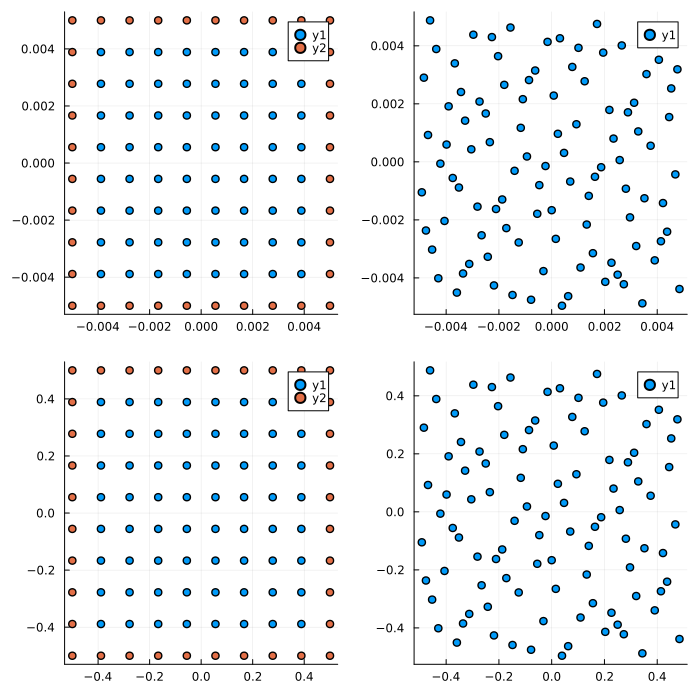

In [29]:
scale = 0.01
shift = 0.5
N_coll = 10
N_test = 100
I_points,B_points = generate_2D_equally_spaced_points(N_coll)
I_points2,B_points2 = generate_2D_equally_spaced_points(N_coll)
N_I = size(I_points)[2]
N_B = size(B_points)[2]
All_points = hcat(I_points,B_points)
All_points = All_points
#Test_points = hcat(generate_2D_equally_spaced_points(117)...)
Test_points = generate_2D_Halton_points(N_test)
Test_points2 = generate_2D_Halton_points(N_test)
Test_points = scale*(Test_points .- shift)
N_tot = size(All_points)[2]

I_points = scale*(I_points .- shift)
B_points = scale*(B_points .- shift)

I_points2 = I_points2 .- shift
B_points2 = B_points2 .- shift

Test_points2  = (Test_points2 .- shift)
println(N_I," ",N_B)
l = @layout [a b; c d]
p1 = scatter(I_points[1,:], I_points[2,:])
p1 = scatter!(B_points[1,:], B_points[2,:])

p2 = scatter(Test_points[1,:], Test_points[2,:])

p3 = scatter(I_points2[1,:], I_points2[2,:])
p3 = scatter!(B_points2[1,:], B_points2[2,:])

p4 = scatter(Test_points2[1,:], Test_points2[2,:])

plot(p1, p2, p3, p4 ,layout = l,size = (700,700))


In [30]:

param = 0
B = crete_block_point_tensors([Test_points,Test_points],[I_points,I_points,B_points,B_points])
B = generate_block_matrices(F_B,B,param)
B = flatten(B)

B2 = crete_block_point_tensors([Test_points2,Test_points2],[I_points2,I_points2,B_points2,B_points2])
B2 = generate_block_matrices(F_B,B2,param)
B2 = flatten(B2)


A = crete_block_point_tensors([I_points,I_points,B_points,B_points],[I_points,I_points,B_points,B_points])
A = generate_block_matrices(F_A,A,param)
A = flatten(A)



A2 = crete_block_point_tensors([I_points2,I_points2,B_points2,B_points2],[I_points2,I_points2,B_points2,B_points2])
A2 = generate_block_matrices(F_A,A2,param)
A2 = flatten(A2)

O = zeros(N_poly,N_poly)

P = generate_P_matrix([I_points,I_points,B_points,B_points],F_PA)
PB = generate_P_matrix([Test_points,Test_points],F_PB)

P2 = generate_P_matrix([I_points2,I_points2,B_points2,B_points2],F_PA)
PB2 = generate_P_matrix([Test_points2,Test_points2],F_PB)

M = [A P
    P' O]
Q = [B PB]

M2 = [A2 P2
    P2' O]
Q2 = [B2 PB2]
d = vcat(ones(2*N_I)*(scale^-0.5),ones(2*N_B)*(scale^-2.5))
D = diagm(0 => d)
DM = diagm(0 => vcat(d,scale .^ -deg_array_poly))
#b = vcat(frankes_func.(I_points[1,:],I_points[2,:]),zeros(N_B+N_poly))
println("cond A: ",cond(A))
println("cond M: ",cond(M))
println("cond A2: ",cond(A2))
println("cond M2: ",cond(M2))
#display(P)
D*A*D - A2
#M2 = Double64.(M2)
#M = Double64.(M)
println("max error DM*M*DM - M2: ",maximum(abs.(DM*M*DM - M2)))
println("max error D*A*D - A2: ",maximum(abs.(D*A*D - A2)))
display(((DM*M*DM - M2)[:,2N_I+2N_B+1:end]))
#maximum((Q2* inv(M2) - Q*inv(M))[:,1:200])

234×34 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0   0.0          …  -2.77556e-17  -5.55112e-17
 0.0  0.0  0.0  0.0  0.0  0.0  -2.22045e-16      0.0          -5.55112e-17
 0.0  0.0  0.0  0.0  0.0  0.0   2.22045e-16     -2.77556e-17  -5.55112e-17
 0.0  0.0  0.0  0.0  0.0  0.0   0.0             -6.93889e-18  -5.55112e-17
 0.0  0.0  0.0  0.0  0.0  0.0   0.0              6.93889e-18  -5.55112e-17
 0.0  0.0  0.0  0.0  0.0  0.0   0.0          …   1.38778e-17  -5.55112e-17
 0.0  0.0  0.0  0.0  0.0  0.0   2.22045e-16      0.0          -5.55112e-17
 0.0  0.0  0.0  0.0  0.0  0.0   0.0              0.0          -5.55112e-17
 0.0  0.0  0.0  0.0  0.0  0.0   0.0              1.38778e-17   1.38778e-17
 0.0  0.0  0.0  0.0  0.0  0.0  -2.22045e-16      1.38778e-17   1.38778e-17
 ⋮                        ⋮                  ⋱                
 0.0  0.0  0.0  0.0  0.0  0.0   0.0          …   0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0              0.0           0.0
 0.0  0.0  0.0  0.0  0.0  0.0

cond A: 9.092996207885043e17
cond M: 8.494534674085645e17
cond A2: 9.225097452741796e9
cond M2: 8.680955207137346e9
max error DM*M*DM - M2: 2.7284841053187847e-12
max error D*A*D - A2: 2.7284841053187847e-12


In [34]:
#R = B*inv(A) - B2*inv(A2)
#display(R)
display(Q*inv(M)[:,1:200])
display(Q2*inv(M2)[:,1:200])
#display(B*inv(A))
#display(B2*inv(A2))
#println(maximum(R[:,1:10]))
#println(size(B2))

200×200 Matrix{Float64}:
 -2.1621e-8   -5.89965e-7  -7.18617e-7  …  -0.0490666     0.0136394
  3.09022e-7   7.47527e-7   4.77712e-7      0.0161574     0.0108811
 -8.41519e-7  -6.06202e-7  -2.51066e-7     -0.0483197     0.00615214
 -4.30022e-7  -6.9378e-7   -1.05472e-6      0.000673004   0.00970561
  4.77083e-7   7.42357e-7   6.37829e-7      0.15724       0.0164445
 -8.17636e-7  -1.42752e-6  -1.0936e-6   …  -0.0228363     0.00825826
  1.50788e-7   1.51005e-7   7.87525e-8     -0.0329693     0.00082222
 -1.31927e-7  -8.6096e-8   -1.26969e-7     -0.00526444    0.0243865
 -1.07643e-6  -6.29528e-7  -7.95491e-8     -0.0225035     0.0110881
  2.31223e-7  -1.22728e-7  -9.24733e-8     -0.013419      0.0075486
  ⋮                                     ⋱                
  2.50312e-7   6.06707e-7   7.72233e-7      0.0207772     0.0125034
 -4.75324e-7  -4.76788e-7  -2.36436e-7     -0.00174066    0.0216064
  1.47613e-7  -2.72002e-7  -1.93629e-7      0.0803905    -0.00415899
 -1.74663e-7  -8.22705e-8  -

200×200 Matrix{Float64}:
 -3.42265e-7   -5.72223e-5   -7.00858e-5   …  -0.0489988     0.0134001
  3.25699e-5    7.6601e-5     4.94628e-5       0.0162224     0.0107117
 -9.23537e-5   -6.83441e-5   -3.06956e-5      -0.0497138     0.00742102
 -4.11057e-5   -6.73293e-5   -0.000103481      0.00102608    0.00940498
  4.92677e-5    7.5411e-5     6.39567e-5       0.158163      0.0159768
 -8.20626e-5   -0.000143689  -0.000110735  …  -0.0224675     0.00791954
  1.70542e-5    1.7107e-5     9.6624e-6       -0.032643      0.000549888
 -1.49577e-5   -1.02425e-5   -1.36349e-5      -0.00544471    0.0246566
 -0.000113733  -6.84783e-5   -1.23115e-5      -0.0240085     0.0122128
  2.60544e-5   -9.45247e-6   -6.56549e-6      -0.0127179     0.00704557
  ⋮                                        ⋱                
  2.34761e-5    5.9106e-5     7.54574e-5       0.0202141     0.01297
 -4.93076e-5   -4.95997e-5   -2.54565e-5      -0.00192195    0.0217082
  1.77001e-5   -2.45997e-5   -1.77324e-5       0.0817225  